In [2]:
import matplotlib.pyplot as plt
import numpy as np

from oscar import OSCAR

%matplotlib inline

<div class="alert alert-info"><h1>Exercise 1: Solar Geoengineering</h1></div>

The most straightforward way to combat climate change is to reduce our carbon emissions; however, given our modern society's dependence on using large amounts of energy, this may be difficult to achieve without rapid adoption (and improvement) of renewable energy technologies. In the event that we are not able to reduce emissions (e.g. if countries do not hold to their Paris agreement commitments), what options do we have to prevent temperatures from rising to dangerous levels?

One option is so-called "solar-geoengineering."  There have been multiple proposals that fall under this umbrella, which essentially aims at reducing the amount of solar radiation absorbed by the Earth.  One proposal is to inject large quantities of sulfate aerosols into the stratosphere; since sulfate aerosols are scattering, they reflect some incoming solar radiation back to space (which is a cooling effect).  This cooling effect could be engineered exactly to offset the warming associated with the anthropogenic emission of greenhouse gases.  

For the purposes of this exercise, the goal will be to keep warming in 2100 to only 2K above the year 1700 value under the RCP8.5 emissions scenario.  In this exercise we will attempt to determine three things:

- The additional (negative) radiative forcing required to keep temperatures below 2K.
- The quantity of emissions of sulfate aerosols into the troposphere that would be required to create this forcing.
- The quantity of emissions of sulfate aerosols into the *stratosphere* to achieve the same effect.

1. Start by running a simulation through year 2100 with the RCP8.5 used for all emissions.  How many degrees do we need to cool things by in 2100 to limit the temperature increase relative to year 1700 to 2K?

In [3]:
rcp85 = OSCAR(scen_ALL='RCP8.5').run(2100)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


The warming we need to offset amounts to 2.71 K.


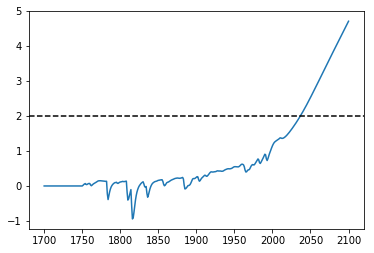

In [4]:
fig, ax = plt.subplots(1, 1)

year = np.arange(len(rcp85['D_gst'])) + 1700

ax.plot(year, rcp85['D_gst'])
ax.axhline(2.0, color='k', ls='--')

print 'The warming we need to offset amounts to {:0.2f} K.'.format(rcp85['D_gst'][-1] - 2.0)

<ol start="2">
<li>What is the value of a constant radiative forcing added to the simulation required to keep warming to 2K in 2100?  Determine this by running a set of simulations varying the magnitude of a prescribed radiative forcing. For example estimate the effect of a constant radiative forcing of -3 W/m2 etc. (use `scen_RF` along with [`np.ones`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ones.html) to prescribe a constant radiative forcing).  Plot the temperature difference between the basic RCP8.5 simulation and the RCP8.5 simulation with a prescribed additional radiative forcing in the year 2100 against the radiative forcing applied.  Estimate the quantitative radiative forcing required to cool by exactly the amount required.</li>
</ol>

In [5]:
magnitudes = [-5.0, -3.0, -1.0]
rcps = {magnitude: OSCAR(scen_ALL='RCP8.5', scen_RF=np.ones(101) * magnitude).run(2100) for magnitude in magnitudes}

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


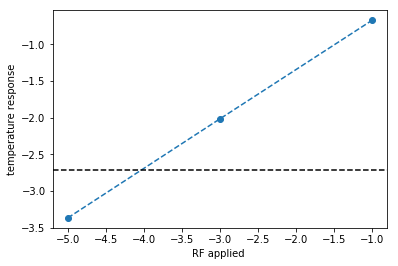

In [6]:
temps = [rcps[m]['D_gst'][-1] - rcp85['D_gst'][-1] for m in sorted(rcps.keys())]

fig, ax = plt.subplots(1, 1)

ax.plot(magnitudes, temps, marker='o', ls='--')
ax.axhline(-2.71, color='k', ls='--')
ax.set_ylabel('temperature response')
ax.set_xlabel('RF applied ')

In [6]:
RF = -2.71 / (temps[1] / magnitudes[1])
print 'Required radiative forcing is about {:0.2f} Watts per square meter'.format(RF)

Required radiative forcing is about -4.04 Watts per square meter


<ol start="3">
<li>Does this value work?  Test it by providing a constant custom radiative forcing alongside the RCP8.5 scenario using the `scen_RF` argument and an array of ones scaled by the additional radiative forcing calculated above.</li>
</ol>

In [7]:
test = OSCAR(scen_ALL='RCP8.5', scen_RF=np.ones(101) * RF).run(2100)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


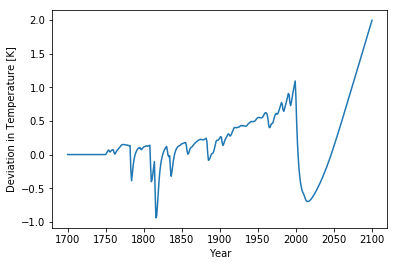

In [40]:
fig, ax = plt.subplots(1, 1)

ax.plot(year, test['D_gst'])
ax.set_xlabel('Year')
ax.set_ylabel('Deviation in Temperature [K]')

<ol start="4">
<li>Let's focus in on the quantitative climate impact of sulfate aerosols.  To do so we'll construct an experiment to determine the relationship between the burden of sulfate aerosols and the radiative forcing.  With these values, we'll be able to determine burden of sulfate aerosols needed to generate the temperature change at 2100 calculated above.  Create a control simulation with no sulfate emissions past 2000 (note this is not quite the default configuration of `OSCAR`; the default configuration of `OSCAR` has no sulfate emissions past 2010).  **Hint: use the [`np.zeros`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.zeros.html) function to generate an array of zeros to be passed into the `scen_ESO2` argument in the `OSCAR` constructor and use `mod_DATAscen='prescribed'`.**</li>
<li>Then create five perturbation simulations, each with constant emissions past 2000: let the first one use 0.5 times the value of sulfate emissions in the control simulation at year 1999, the second use 1.0 times sulfate emissions in 1999, the third use 1.5, the fourth use 2.0, and the fifth use 2.5.  **Hint: use the [`np.ones`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ones.html) function to create an array of ones, scale that array by the appropriate value for each simulation, pass it to `scen_ESO2` and use `mod_DATAscen='prescribed'`.**</li>
</ol>

In [ ]:
control = OSCAR(scen_ESO2=np.zeros(101), mod_DATAscen='prescribed').run(2100)

In [10]:
simulations = {}
strengths = [0.5, 1.0, 1.5, 2.0, 2.5]
for strength in strengths:
    simulations[strength] = OSCAR(
        scen_ESO2=strength * control['ESO2']['Total'][299] * np.ones(101),
        mod_DATAscen='prescribed').run(2100)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


<ol start="5">
<li>Plot the difference in radiative forcing of sulfate aerosols (`'RF_SO4'`) between each of the perturbed simulations and the control simulation in year 2100 as a function of the difference in sulfate burden (`'D_SO4'`). What is the approximate slope of a line fitting the points (no need to do linear regression here)?</li>
</ol>

In [11]:
drf = [simulations[s]['RF_SO4'][-1] - control['RF_SO4'][-1] 
       for s in sorted(simulations.keys())]

In [12]:
dburden = [simulations[s]['D_SO4'][-1] - control['D_SO4'][-1] 
           for s in sorted(simulations.keys())]

The slope of the line is: -0.3627 Watts per square meter per Tg SO4.


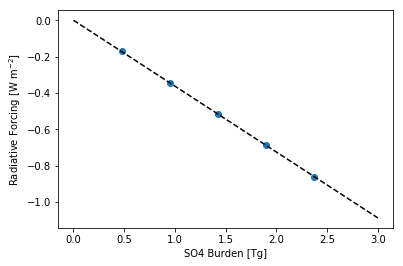

In [16]:
fig, ax = plt.subplots(1, 1)

ax.plot(dburden, drf, marker='o', ls='')

slope = drf[-1] / dburden[-1]
x = np.linspace(0, 3)
ax.plot(x, slope * x, color='k', ls='--')

ax.set_xlabel('SO4 Burden [Tg]')
ax.set_ylabel('Radiative Forcing [W m$^{-2}$]')
print 'The slope of the line is: {:0.4f} Watts per square meter per Tg SO4.'.format(slope)

<ol start="6">
<li>According to this calculation, what additional burden of sulfate will be needed to generate the radiative forcing calculated in question (2)?</li>
</ol>

In [17]:
additional_burden = RF / slope
print 'The additional burden of sulfate required is {:0.2f} Tg.'.format(additional_burden)

The additional burden of sulfate required is 11.13 Tg.


<ol start="7">
<li>What additional emissions will be needed to achieve this burden?  Determine this by plotting the sulfur dioxide emissions versus sulfate burden in the last year of the perturbed simulations; i.e. assume $S = \tau E$, where $S$ is the sulfate burden, and $E$ is the emissions of SO2. Find $\tau$.</li>
</ol>

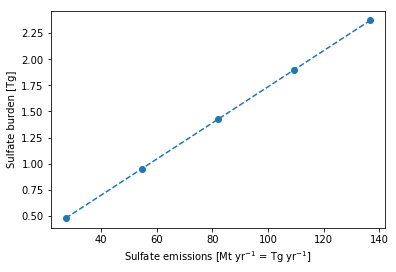

In [18]:
d = [simulations[s]['D_SO4'][-1] for s in strengths]
e = [simulations[s]['ESO2']['Total'][-1] for s in strengths]

fig, ax = plt.subplots(1, 1)
ax.plot(e, d, marker='o', ls='--')
ax.set_ylabel('Sulfate burden [Tg]')
ax.set_xlabel('Sulfate emissions [Mt yr$^{-1}$ = Tg yr$^{-1}$]')
tau = d[-1] / e[-1]

In [21]:
additional_emissions = additional_burden / tau 
print 'The additional emissions required will be {:0.2f} Mt per year'.format(additional_emissions)

The additional emissions required will be 640.94 Mt per year


<ol start="8">
<li>What is the significance of the slope of the line fitting the sulfur dioxide emissions to sulfate burden?</li>
</ol>

Note that we can approximate the budget for the burden of sulfate in the atmosphere as being:
$$\frac{dS}{dt} \approx E - \frac{S}{\tau}$$
Here $S$ is the burden, and $E$ is the emissions.  In steady state (i.e. when the sulfate burden is not changing in the atmosphere, as it is at the end of the perturbed simulations) the time derivative is zero.  Therefore:
$$0 = E - \frac{S}{\tau} \implies E = \frac{S}{\tau} \implies \tau = \frac{S}{E}.$$
This is the slope of the line we computed above.

Now, consider the case where emissions are zero ($E = 0$), but the burden is now allowed to change.  The differential equation becomes:
$$ \frac{dS}{dt} = -\frac{S}{\tau}.$$
This equation has solutions of the form:
$$S(t) = S_0 e^{-\frac{t}{\tau}}.$$
Where have we seen this equation before?  What was the significance of $\tau$?  Convert the $\tau$ computed above from having units of years to units of days.  

In [22]:
# A lifetime of about a week.  
# Very much in line with what we would expect of sulfate in the troposphere.
tau * 365  

6.3387033622711897

<ol start="9">
<li>Test this by adding these additional emissions to the sulfate emissions to RCP8.5's.</li>
</ol>

In [23]:
new = OSCAR(scen_EFF='RCP8.5', scen_ECH4='RCP8.5',
         scen_EN2O='RCP8.5', 
         scen_ESO2=rcp85['ESO2']['Total'][300:] + additional_emissions,
         scen_ENH3='RCP8.5', scen_EOC='RCP8.5',
         scen_EBC='RCP8.5', scen_Ehalo='RCP8.5',
         scen_ENOX='RCP8.5', scen_ECO='RCP8.5',
         scen_EVOC='RCP8.5', scen_LULCC='RCP8.5',
         scen_RFnat='RCP8.5', scen_RFant='RCP8.5',
         scen_HARV='RCP8.5', scen_SHIFT='RCP8.5',
         mod_DATAscen='prescribed').run(2100)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


We find that this overshoots.  Could this be due to feedbacks?

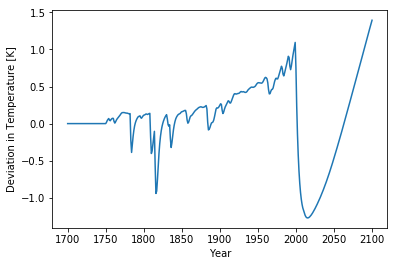

In [24]:
fig, ax = plt.subplots(1, 1)

ax.plot(year, new['D_gst'])
ax.set_xlabel('Year')
ax.set_ylabel('Deviation in Temperature [K]')

<ol start="10">
<li>If the aerosols were injected into the stratosphere, where they have a longer lifetime (about 2 years) (Rasch et al. (2008)), how much emissions of sulfate would be required per year?  Note from the equation above, to achieve a certain sulfate burden, $S_{geoengineering}$ one requires $E_{geoengineering} = \frac{S_{geoengineering}}{\tau}$ emissions.  Plug in this new value of the lifetime and solve for the emissions.  What is the amount of emissions required per Watt per square meter radiative forcing in this case?</li>
</ol>

See the following paper for this estimate of the lifetime of sulfate in the stratosphere:

Rasch, P. J., Tilmes, S., Turco, R. P., Robock, A., Oman, L., Chen, C.-C. (Jack), … Garcia, R. R. (2008). An overview of geoengineering of climate using stratospheric sulphate aerosols. Philosophical Transactions of the Royal Society of London A: Mathematical, Physical and Engineering Sciences, 366(1882), 4007–4037. https://doi.org/10.1098/rsta.2008.0131


In [35]:
stratospheric_emissions = additional_burden / 2.
print 'The amount emissions required in the stratosphere would be {:0.2f} Tg per year'.format(stratospheric_emissions)

The amount emissions required in the stratosphere would be 5.57 Tg per year


In [39]:
# About 1.38 Mt per yr per Watt per square meter negative forcing.  
stratospheric_emissions / -RF

1.3785728154725529

From the literature, it is estimated that per Watt per meter squared forcing, one would require about one megaton per year of sulfate injected into the stratosphere (McClellan et al. (2012):

> "Initial estimates of the amount of sulfur as SO2 required to provide 1 W m−2 of solar flux change were approximately 1 Mt of sulfur per year (Robock 2008)."

McClellan, J., Keith, D. W., & Apt, J. (2012). Cost analysis of stratospheric albedo modification delivery systems. Environmental Research Letters, 7(3), 34019. https://doi.org/10.1088/1748-9326/7/3/034019